In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import pickle
import matplotlib.pyplot as plt

In [2]:
with open('../dataset/따릉이_대여이력_2019v2.pkl','rb') as f:
    df2019=pickle.load(f)
    
with open('../dataset/따릉이_대여이력_2020v2.pkl','rb') as f:
    df2020=pickle.load(f)

In [3]:
df2019.head()

,rent_id,rent_time,return_id,return_time,travel_time,travel_distance,fare,sex,age
0,1421,2019-01-01 00:00:44,1420,2019-01-01 00:03:53,189.0,580.0,BIL_004,\N,AGE_002
1,1408,2019-01-01 00:02:16,1433,2019-01-01 00:07:07,291.0,1020.0,BIL_002,F,AGE_005
2,347,2019-01-01 00:04:12,387,2019-01-01 00:07:07,175.0,550.0,BIL_014,M,AGE_003
3,615,2019-01-01 00:03:09,612,2019-01-01 00:07:27,258.0,700.0,BIL_002,\N,AGE_002
4,1177,2019-01-01 00:01:44,1152,2019-01-01 00:08:09,385.0,1090.0,BIL_006,\N,AGE_002


In [4]:
fare2019=sorted(df2019['fare'].unique().tolist())
fare2020=sorted(df2019['fare'].unique().tolist())

In [5]:
fare2019

['BIL_001',
 'BIL_002',
 'BIL_004',
 'BIL_005',
 'BIL_006',
 'BIL_007',
 'BIL_008',
 'BIL_011',
 'BIL_012',
 'BIL_014',
 'BIL_015',
 'BIL_016',
 'BIL_017',
 'BIL_020']

In [6]:
fare2020

['BIL_001',
 'BIL_002',
 'BIL_004',
 'BIL_005',
 'BIL_006',
 'BIL_007',
 'BIL_008',
 'BIL_011',
 'BIL_012',
 'BIL_014',
 'BIL_015',
 'BIL_016',
 'BIL_017',
 'BIL_020']

#### 정기권 / 일일권 타입

정기권 - 001,002,004,005 / 011,012,014,015

일일권 - 006,007 / 016/017

In [7]:
regular=['BIL_001','BIL_002','BIL_004','BIL_005','BIL_011','BIL_012','BIL_014','BIL_015']
daily=['BIL_006','BIL_007','BIL_016','BIL_017']
others=['BIL_008', 'BIL_020','BIL_021']

In [8]:
df2019['type']=df2019['fare'].replace(regular,'Regular').replace(daily,'Daily').replace(others,'Others')
df2020['type']=df2020['fare'].replace(regular,'Regular').replace(daily,'Daily').replace(others,'Others')

In [9]:
def drop_others(df):
    df=df.drop(df[df['type']=='Others'].index).reset_index(drop=True)
    
    return df

In [10]:
df2019=drop_others(df2019)
df2020=drop_others(df2020)

### 이용시간 전처리

In [11]:
times={'BIL_001':'1H',
       'BIL_002':'1H',
       'BIL_004':'1H',
       'BIL_005':'1H',
       'BIL_006':'1H',
       'BIL_007':'1H',
       'BIL_008':'OTHER',
       'BIL_020':'OTHER',
       'BIL_021':'OTHER',
       'BIL_011':'2H',
       'BIL_012':'2H',
       'BIL_014':'2H',
       'BIL_015':'2H',
       'BIL_016':'2H',
       'BIL_017':'2H'}

In [12]:
df2019['times']=df2019['fare'].map(times)
df2020['times']=df2020['fare'].map(times)

In [13]:
df2019=df2019.drop(df2019[(df2019['travel_time']<60)].index).reset_index(drop=True)
df2020=df2020.drop(df2020[(df2020['travel_time']<60)].index).reset_index(drop=True)


df2019=df2019.drop(df2019[(df2019['times']=='1H') & (df2019['travel_time']>14400)].index).reset_index(drop=True)
df2020=df2020.drop(df2020[(df2020['times']=='1H') & (df2020['travel_time']>14400)].index).reset_index(drop=True)
df2019=df2019.drop(df2019[(df2019['times']=='2H') & (df2019['travel_time']>21600)].index).reset_index(drop=True)
df2020=df2020.drop(df2020[(df2020['times']=='2H') & (df2020['travel_time']>21600)].index).reset_index(drop=True)

### 이용 거리 전처리

In [14]:
df2019=df2019.drop(df2019[df2019['travel_distance']==0].index).reset_index(drop=True)
df2020=df2020.drop(df2020[df2020['travel_distance']==0].index).reset_index(drop=True)

df2019=df2019.drop(df2019[(df2019['times']=='1H') & (df2019['travel_distance']>65200)].index).reset_index(drop=True)
df2020=df2020.drop(df2020[(df2020['times']=='1H') & (df2020['travel_distance']>65200)].index).reset_index(drop=True)

df2019=df2019.drop(df2019[(df2019['times']=='2H') & (df2019['travel_distance']>97800)].index).reset_index(drop=True)
df2020=df2020.drop(df2020[(df2020['times']=='2H') & (df2020['travel_distance']>97800)].index).reset_index(drop=True)

### 연/월/일/주말 주중 구분

In [15]:
def year_month_day(df):
    df['year']=df['rent_time'].dt.year
    df['month']=df['rent_time'].dt.month
    df['day']=df['rent_time'].dt.day
    df['dayofweek']=df['rent_time'].dt.dayofweek
    df['hour']=df['rent_time'].dt.hour

    weeks={0:'Mon',
          1:'Tue',
          2:'Wed',
          3:'Thu',
          4:'Fri',
          5:'Sat',
          6:'Sun'}

    df['dayofweek']=df['dayofweek'].map(weeks)
    
    return df

In [16]:
df2019=year_month_day(df2019)
df2020=year_month_day(df2020)

In [17]:
type(df2019['month'].iloc[0])

numpy.int64

In [18]:
def week_hol(df):
    df_week=df.drop(df[(df['dayofweek']=='Sat') | (df['dayofweek']=='Sun')].index).reset_index(drop=True)
    df_hol=df.iloc[df[(df['dayofweek']=='Sat') | (df['dayofweek']=='Sun')].index].reset_index(drop=True)
    
    return df_week, df_hol

In [19]:
df2019_week, df2019_hol=week_hol(df2019)

print('2019 주중 : ',df2019_week.shape)
print('2019 주말 : ',df2019_hol.shape)

2019 주중 :  (13377729, 16)
2019 주말 :  (4738456, 16)


In [20]:
df2020_week, df2020_hol=week_hol(df2020)

print('2020 주중 : ',df2020_week.shape)
print('2020 주말 : ',df2020_hol.shape)

2020 주중 :  (5744157, 16)
2020 주말 :  (2202585, 16)


#### 분기 구분

In [21]:
def make_quarter(df):
    df_first=df.iloc[df[(df['month']==1) | (df['month']==2) | (df['month']==3)].index].reset_index(drop=True)
    df_second=df.iloc[df[(df['month']==4) | (df['month']==5) | (df['month']==6)].index].reset_index(drop=True)
    df_third=df.iloc[df[(df['month']==7) | (df['month']==8) | (df['month']==9)].index].reset_index(drop=True)
    df_fourth=df.iloc[df[(df['month']==10) | (df['month']==11) | (df['month']==12)].index].reset_index(drop=True)
    
    return df_first, df_second, df_third, df_fourth

In [22]:
df2019_week1, df2019_week2, df2019_week3, df2019_week4=make_quarter(df2019_week)
df2019_hol1, df2019_hol2, df2019_hol3, df2019_hol4=make_quarter(df2019_hol)

print('2019 주중 1분기 : ',df2019_week1.shape)
print('2019 주중 2분기 : ',df2019_week2.shape)
print('2019 주중 3분기 : ',df2019_week3.shape)
print('2019 주중 4분기 : ',df2019_week4.shape)

print('2019 주말 1분기 : ',df2019_hol1.shape)
print('2019 주말 2분기 : ',df2019_hol2.shape)
print('2019 주말 3분기 : ',df2019_hol3.shape)
print('2019 주말 4분기 : ',df2019_hol4.shape)

2019 주중 1분기 :  (1362728, 16)
2019 주중 2분기 :  (4143418, 16)
2019 주중 3분기 :  (4472909, 16)
2019 주중 4분기 :  (3398674, 16)
2019 주말 1분기 :  (452481, 16)
2019 주말 2분기 :  (1579954, 16)
2019 주말 3분기 :  (1545415, 16)
2019 주말 4분기 :  (1160606, 16)


In [23]:
df2020_week1, df2020_week2, df2020_week3, df2020_week4=make_quarter(df2020_week)
df2020_hol1, df2020_hol2, df2020_hol3, df2020_hol4=make_quarter(df2020_hol)

print('2020 주중 1분기 : ',df2020_week1.shape)
print('2020 주중 2분기 : ',df2020_week2.shape)
print('2020 주중 3분기 : ',df2020_week3.shape)
print('2020 주중 4분기 : ',df2020_week4.shape)

print('2020 주말 1분기 : ',df2020_hol1.shape)
print('2020 주말 2분기 : ',df2020_hol2.shape)
print('2020 주말 3분기 : ',df2020_hol3.shape)
print('2020 주말 4분기 : ',df2020_hol4.shape)

2020 주중 1분기 :  (1995664, 16)
2020 주중 2분기 :  (2112413, 16)
2020 주중 3분기 :  (1261485, 16)
2020 주중 4분기 :  (374595, 16)
2020 주말 1분기 :  (733932, 16)
2020 주말 2분기 :  (812696, 16)
2020 주말 3분기 :  (529682, 16)
2020 주말 4분기 :  (126275, 16)


### 대여 시작 시간 기준 사용권 비율 확인

In [45]:
def show_ratio(df):
    ratio=df.groupby('hour')['type'].value_counts(normalize=True).unstack()['Regular']
    
    return pd.DataFrame(ratio.values.reshape(1,24), columns=range(0,24))

In [46]:
ratio_df2019_week1=show_ratio(df2019_week1)
ratio_df2019_week2=show_ratio(df2019_week2)
ratio_df2019_week3=show_ratio(df2019_week3)
ratio_df2019_week4=show_ratio(df2019_week4)

ratio_df2019_week=pd.concat([ratio_df2019_week1, ratio_df2019_week2, ratio_df2019_week3, ratio_df2019_week4]).reset_index(drop=True)
ratio_df2019_week

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,0.818285,0.823559,0.822559,0.836888,0.868959,0.929121,0.969622,0.971027,0.964015,0.946014,...,0.815611,0.802558,0.817800,0.856901,0.896367,0.877607,0.860196,0.863406,0.872798,0.867726
1,0.748736,0.749980,0.761588,0.777075,0.803404,0.902733,0.955217,0.959109,0.955245,0.925260,...,0.773226,0.750583,0.763030,0.801471,0.831564,0.781966,0.753823,0.755695,0.780622,0.779533
2,0.760686,0.757858,0.766239,0.782250,0.803089,0.897701,0.954492,0.963467,0.962131,0.935888,...,0.827257,0.813177,0.815315,0.842476,0.856343,0.803278,0.770437,0.769741,0.790598,0.789291
3,0.803226,0.804181,0.814244,0.826050,0.844499,0.917472,0.961182,0.963115,0.958363,0.930777,...,0.807727,0.797213,0.810800,0.843408,0.869166,0.838204,0.822395,0.826429,0.839009,0.836992


In [47]:
ratio_df2019_hol1=show_ratio(df2019_hol1)
ratio_df2019_hol2=show_ratio(df2019_hol2)
ratio_df2019_hol3=show_ratio(df2019_hol3)
ratio_df2019_hol4=show_ratio(df2019_hol4)

ratio_df2019_hol=pd.concat([ratio_df2019_hol1, ratio_df2019_hol2, ratio_df2019_hol3, ratio_df2019_hol4]).reset_index(drop=True)
ratio_df2019_hol

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,0.744539,0.752448,0.773512,0.794458,0.815907,0.868107,0.921118,0.918775,0.917110,0.893808,...,0.678232,0.643914,0.646289,0.686498,0.728006,0.737276,0.740396,0.763708,0.793219,0.797593
1,0.652773,0.649782,0.676730,0.670912,0.708276,0.794246,0.854833,0.868141,0.871783,0.844492,...,0.613533,0.585848,0.571589,0.579989,0.593291,0.587645,0.596932,0.625861,0.660152,0.676725
2,0.678013,0.680187,0.699000,0.719848,0.736425,0.807652,0.873937,0.877539,0.879357,0.861375,...,0.717480,0.689680,0.670381,0.665552,0.659190,0.641347,0.641304,0.663960,0.695662,0.703753
3,0.708746,0.710194,0.735210,0.761085,0.770881,0.830193,0.890766,0.890305,0.885368,0.860324,...,0.662180,0.637412,0.639716,0.669483,0.699002,0.697389,0.699625,0.722681,0.754137,0.763488


In [48]:
ratio_df2020_week1=show_ratio(df2020_week1)
ratio_df2020_week2=show_ratio(df2020_week2)
ratio_df2020_week3=show_ratio(df2020_week3)
ratio_df2020_week4=show_ratio(df2020_week4)

ratio_df2020_week=pd.concat([ratio_df2020_week1, ratio_df2020_week2, ratio_df2020_week3, ratio_df2020_week4]).reset_index(drop=True)
ratio_df2020_week

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,0.785343,0.790003,0.801362,0.803971,0.833123,0.903617,0.954417,0.961620,0.956256,0.924428,...,0.723797,0.704966,0.716538,0.785743,0.834457,0.796130,0.770781,0.778279,0.805218,0.807980
1,0.653251,0.680696,0.692391,0.701062,0.729767,0.849391,0.919577,0.934393,0.929358,0.879825,...,0.655675,0.640071,0.662339,0.730062,0.764780,0.701103,0.663105,0.668356,0.691727,0.690446
2,0.687032,0.706024,0.717801,0.723136,0.762215,0.859470,0.925646,0.937931,0.936380,0.889713,...,0.761481,0.750887,0.764326,0.791444,0.796682,0.729974,0.690221,0.690645,0.714761,0.711162
3,0.729232,0.747454,0.749634,0.756067,0.828012,0.897424,0.953748,0.951726,0.939328,0.889083,...,0.738494,0.722418,0.748696,0.796665,0.832257,0.796783,0.771144,0.774984,0.786085,0.774902


In [49]:
ratio_df2020_hol1=show_ratio(df2020_hol1)
ratio_df2020_hol2=show_ratio(df2020_hol2)
ratio_df2020_hol3=show_ratio(df2020_hol3)
ratio_df2020_hol4=show_ratio(df2020_hol4)

ratio_df2020_hol=pd.concat([ratio_df2020_hol1, ratio_df2020_hol2, ratio_df2020_hol3, ratio_df2020_hol4]).reset_index(drop=True)
ratio_df2020_hol

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,0.729451,0.743637,0.765875,0.774671,0.796548,0.820178,0.882353,0.893245,0.892973,0.842113,...,0.562112,0.540280,0.552164,0.587159,0.635470,0.662498,0.668494,0.694430,0.727501,0.748000
1,0.590114,0.612121,0.644047,0.649662,0.661083,0.751175,0.802705,0.803432,0.793377,0.747356,...,0.514356,0.494957,0.491396,0.512961,0.539404,0.534072,0.536210,0.563302,0.597033,0.605499
2,0.612692,0.627659,0.655727,0.666916,0.694466,0.773602,0.802081,0.801057,0.802739,0.762542,...,0.623689,0.601333,0.590177,0.596223,0.594920,0.578593,0.577532,0.596358,0.623770,0.630767
3,0.634855,0.653874,0.672084,0.663358,0.736842,0.841845,0.855469,0.855051,0.826535,0.797971,...,0.582540,0.569078,0.580637,0.623191,0.656393,0.649252,0.649548,0.675204,0.701453,0.688989


### 사용권 비율 그래프로 확인하기

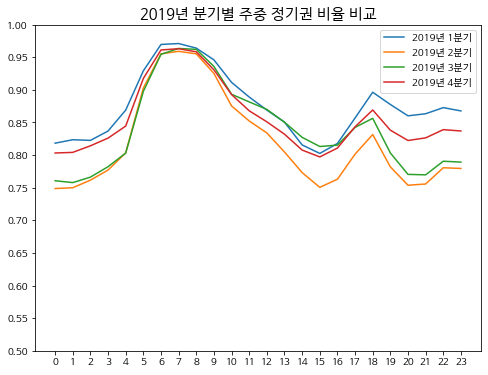

In [56]:
plt.rcParams['font.family']='Hancom Gothic'

plt.figure(figsize=(8,6))
plt.plot(ratio_df2019_week.iloc[0], label='2019년 1분기')
plt.plot(ratio_df2019_week.iloc[1], label='2019년 2분기')
plt.plot(ratio_df2019_week.iloc[2], label='2019년 3분기')
plt.plot(ratio_df2019_week.iloc[3], label='2019년 4분기')
plt.yticks([0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95,1.0])
plt.xticks(range(0,24))
plt.title('2019년 분기별 주중 정기권 비율 비교', fontsize=15)
plt.legend()
plt.show()

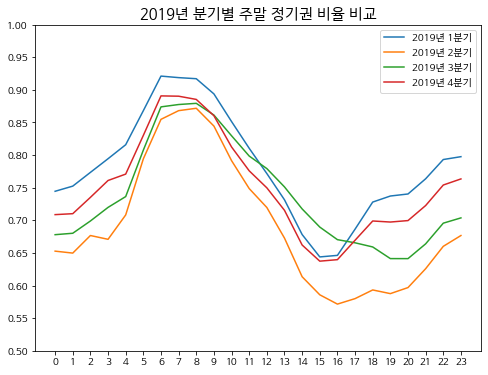

In [57]:
plt.rcParams['font.family']='Hancom Gothic'

plt.figure(figsize=(8,6))
plt.plot(ratio_df2019_hol.iloc[0], label='2019년 1분기')
plt.plot(ratio_df2019_hol.iloc[1], label='2019년 2분기')
plt.plot(ratio_df2019_hol.iloc[2], label='2019년 3분기')
plt.plot(ratio_df2019_hol.iloc[3], label='2019년 4분기')
plt.yticks([0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95,1.0])
plt.xticks(range(0,24))
plt.title('2019년 분기별 주말 정기권 비율 비교', fontsize=15)
plt.legend()
plt.show()

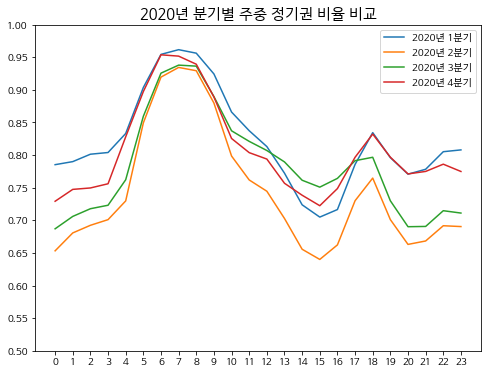

In [58]:
plt.rcParams['font.family']='Hancom Gothic'

plt.figure(figsize=(8,6))
plt.plot(ratio_df2020_week.iloc[0], label='2020년 1분기')
plt.plot(ratio_df2020_week.iloc[1], label='2020년 2분기')
plt.plot(ratio_df2020_week.iloc[2], label='2020년 3분기')
plt.plot(ratio_df2020_week.iloc[3], label='2020년 4분기')
plt.yticks([0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95,1.0])
plt.xticks(range(0,24))
plt.title('2020년 분기별 주중 정기권 비율 비교', fontsize=15)
plt.legend()
plt.show()

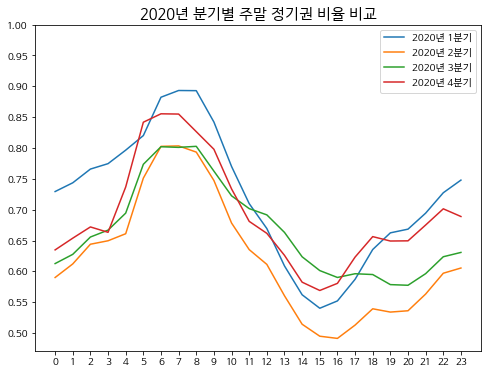

In [59]:
plt.rcParams['font.family']='Hancom Gothic'

plt.figure(figsize=(8,6))
plt.plot(ratio_df2020_hol.iloc[0], label='2020년 1분기')
plt.plot(ratio_df2020_hol.iloc[1], label='2020년 2분기')
plt.plot(ratio_df2020_hol.iloc[2], label='2020년 3분기')
plt.plot(ratio_df2020_hol.iloc[3], label='2020년 4분기')
plt.yticks([0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95,1.0])
plt.xticks(range(0,24))
plt.title('2020년 분기별 주말 정기권 비율 비교', fontsize=15)
plt.legend()
plt.show()

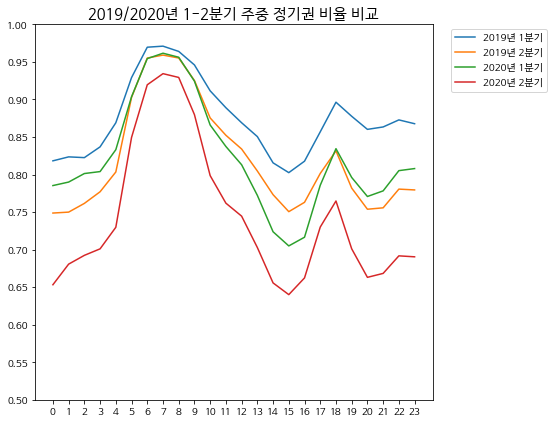

In [73]:
plt.rcParams['font.family']='Hancom Gothic'

plt.figure(figsize=(8,6))
plt.plot(ratio_df2019_week.iloc[0], label='2019년 1분기')
plt.plot(ratio_df2019_week.iloc[1], label='2019년 2분기')
plt.plot(ratio_df2020_week.iloc[0], label='2020년 1분기')
plt.plot(ratio_df2020_week.iloc[1], label='2020년 2분기')
plt.yticks([0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95,1.0])
plt.xticks(range(0,24))
plt.title('2019/2020년 1-2분기 주중 정기권 비율 비교', fontsize=15)
plt.legend(bbox_to_anchor=(1.3,1.0), loc='upper right')
plt.tight_layout()
plt.show()

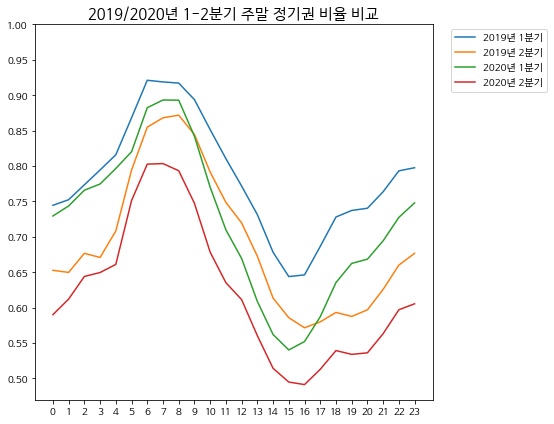

In [74]:
plt.rcParams['font.family']='Hancom Gothic'

plt.figure(figsize=(8,6))
plt.plot(ratio_df2019_hol.iloc[0], label='2019년 1분기')
plt.plot(ratio_df2019_hol.iloc[1], label='2019년 2분기')
plt.plot(ratio_df2020_hol.iloc[0], label='2020년 1분기')
plt.plot(ratio_df2020_hol.iloc[1], label='2020년 2분기')
plt.yticks([0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95,1.0])
plt.xticks(range(0,24))
plt.title('2019/2020년 1-2분기 주말 정기권 비율 비교', fontsize=15)
plt.legend(bbox_to_anchor=(1.3,1.0), loc='upper right')
plt.tight_layout()
plt.show()

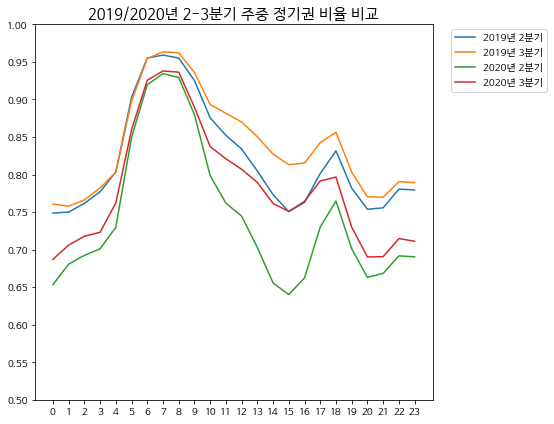

In [75]:
plt.rcParams['font.family']='Hancom Gothic'

plt.figure(figsize=(8,6))
plt.plot(ratio_df2019_week.iloc[1], label='2019년 2분기')
plt.plot(ratio_df2019_week.iloc[2], label='2019년 3분기')
plt.plot(ratio_df2020_week.iloc[1], label='2020년 2분기')
plt.plot(ratio_df2020_week.iloc[2], label='2020년 3분기')
plt.yticks([0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95,1.0])
plt.xticks(range(0,24))
plt.title('2019/2020년 2-3분기 주중 정기권 비율 비교', fontsize=15)
plt.legend(bbox_to_anchor=(1.3,1.0), loc='upper right')
plt.tight_layout()
plt.show()

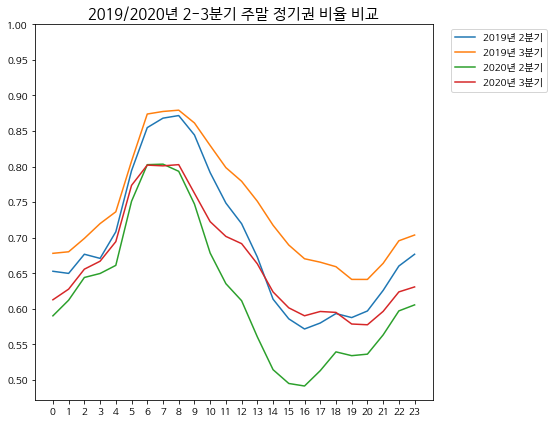

In [76]:
plt.rcParams['font.family']='Hancom Gothic'

plt.figure(figsize=(8,6))
plt.plot(ratio_df2019_hol.iloc[1], label='2019년 2분기')
plt.plot(ratio_df2019_hol.iloc[2], label='2019년 3분기')
plt.plot(ratio_df2020_hol.iloc[1], label='2020년 2분기')
plt.plot(ratio_df2020_hol.iloc[2], label='2020년 3분기')
plt.yticks([0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95,1.0])
plt.xticks(range(0,24))
plt.title('2019/2020년 2-3분기 주말 정기권 비율 비교', fontsize=15)
plt.legend(bbox_to_anchor=(1.3,1.0), loc='upper right')
plt.tight_layout()
plt.show()

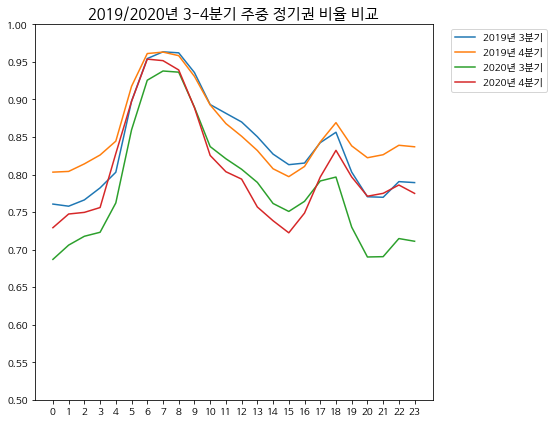

In [77]:
plt.rcParams['font.family']='Hancom Gothic'

plt.figure(figsize=(8,6))
plt.plot(ratio_df2019_week.iloc[2], label='2019년 3분기')
plt.plot(ratio_df2019_week.iloc[3], label='2019년 4분기')
plt.plot(ratio_df2020_week.iloc[2], label='2020년 3분기')
plt.plot(ratio_df2020_week.iloc[3], label='2020년 4분기')
plt.yticks([0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95,1.0])
plt.xticks(range(0,24))
plt.title('2019/2020년 3-4분기 주중 정기권 비율 비교', fontsize=15)
plt.legend(bbox_to_anchor=(1.3,1.0), loc='upper right')
plt.tight_layout()
plt.show()

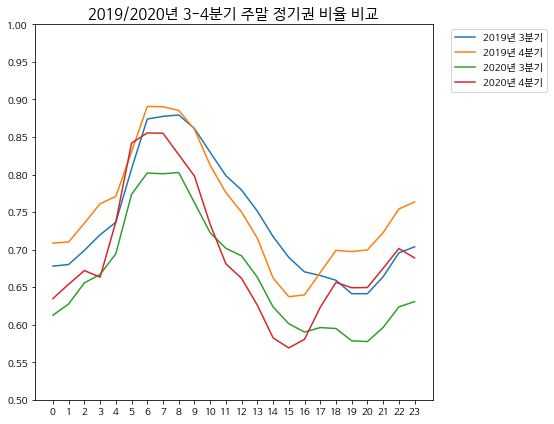

In [78]:
plt.rcParams['font.family']='Hancom Gothic'

plt.figure(figsize=(8,6))
plt.plot(ratio_df2019_hol.iloc[2], label='2019년 3분기')
plt.plot(ratio_df2019_hol.iloc[3], label='2019년 4분기')
plt.plot(ratio_df2020_hol.iloc[2], label='2020년 3분기')
plt.plot(ratio_df2020_hol.iloc[3], label='2020년 4분기')
plt.yticks([0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95,1.0])
plt.xticks(range(0,24))
plt.title('2019/2020년 3-4분기 주말 정기권 비율 비교', fontsize=15)
plt.legend(bbox_to_anchor=(1.3,1.0), loc='upper right')
plt.tight_layout()
plt.show()